<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 2 - Fronteras no Lineales </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* similaridad: KNN
* SVM, Decision trees y Redes neuronales
* Tipos de fronteras de clasificación y regresión.
* Métodos de *kernel*.
* Selección de hı́per-parámetros estructurales en SVM, Arboles de Decisión, k-NN y Redes Neuronales.
 

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de discusión y entrega: 30 de Noviembre y 3 de Diciembre (13:00 hrs) respectivamente.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea2-INF393-II-2018]

<hr style="height:2px;border:none"/>

### Paquetes de instalación

Como es usual utilizaremos *numpy, scipy, matplotlib* y *sklearn*. Además de éstas se necesitará instalar **keras**, una librerı́a en python para prototipado rápido de modelos basados en redes neuronales, muy similar en espı́ritu a *sklearn*. La librerı́a puede usar *TensorFlow* o *Theano* como backend, siendo éstas las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos. Para detalles sobre la instalación puede revisar [[1]](#refs) o escribir un email a su ayudante.



La tarea se divide en secciones:

[1.](#primero) Tipos de fronteras en clasificación  
[2.](#segundo) Un problema* Multi-label*  
[3.](#tercero) *Taxi Trip Duration*: Predicción de duración de viaje  
[4.](#cuarto) Entendimiento de imágenes de personas

<a id="primero"></a>
## 1. Tipos de fronteras en clasificación

Como se ha discutido en clases, los problemas de clasificación pueden ser representados de distintas maneras, en donde estas representaciones definen un espacio de entrada del dominio de los datos ($\mathbb{R}_{\mathbb{X}}$). Los ejemplos dentro del espacio de entrada (*manifold*) pueden tener distintas formas, donde estas indicarán si es que estos ejemplos tendrán fronteras lineales o no. Con el propósito de analizar los distintos tipos de fronteras que definen los algoritmos de clasificación, se trabajará con un dataset sintético lo cual es ideal para analizar los diferentes tipos, así hacer un recorrido rápido por las grandes ideas en la búsqueda dela no-linealidad.

Este dataset de jugete está en un espacio de 2 dimensiones y es conformado por dos conjuntos de datos, pudiendo ver que la frontera entre ellos claramente no es lineal. El dataset representa al problema XOR, pero para trabajarlo de una manera distinta se generán gausianas para agregar un poco de ruido en el conjunto de entrenamiento y que no sea un problema trivial. El código que los genera es el siguiente:
``` python
import numpy as np
def do_gaussianXOR(n1=250,n2=250)
    rng = np.random.RandomState(0)
    u = 0.5
    std = 0.3 #el ruido se agrega aca
    primer_c = rng.normal(loc=[u,u],scale=std,size=(n1,2))
    segundo_c = rng.normal(loc=[-u,u],scale=std,size=(n2,2))
    tercer_c = rng.normal(loc=[-u,-u],scale=std,size=(n1,2))
    cuarto_c = rng.normal(loc=[u,-u],scale=std,size=(n2,2))
    X_train = np.vstack((primer_c,segundo_c,tercer_c,cuarto_c))
    Y_train = np.hstack((np.zeros(n1),np.ones(n2),np.zeros(n1),np.ones(n2)))   
    X_test = rng.uniform(low=-1.0,high=1.0,size=( (n1+n2),2))
    Y_test = np.logical_xor(X_test[:,0] > 0, X_test[:,1] > 0)
    return X_train,Y_train,X_test,Y_test
```

> a) Construya el conjunto de datos (*dataset*) y describa el proceso de creación de éstos. Determine cuántos registros contiene cada conjunto y visualı́celos.
``` python
X_train,Y_train,X_test,Y_test = do_gaussianXOR()
```

Para visualizar las fronteras de los distintos algoritmos utilice el siguiente código:

```python
import matplotlib.pyplot as plt
def visualize_border(model,x,y,title=""):
    fig, axis = plt.subplots(1, 1,figsize=(12, 6))

    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #or predict_proba
    Z = Z.reshape(xx.shape)
    Zplot = Z > 0.5
    
    axis.scatter(x[:,0],x[:,1],s=50,c=y,zorder=10,cmap=plt.cm.winter)
    axis.contour(xx, yy, Z,levels=[-1, 0, 1])
    axis.pcolormesh(xx, yy, Zplot ,cmap=plt.cm.YlGn)
    plt.title(title)
    plt.show()
```

> b) Entrene el clasificador Linear Discriminant Analysis (LDA) y visualice la frontera de decisión que define este algoritmo. Comente cualitativamente lo que observa.
```python
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
model.fit(X,y)
visualize_border(model,X,y,"LDA")
```

> c) Entrene el clasificador Quadratic Discriminant Analysis (QDA) y visualice la frontera de decisión que define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qué difieren y en qué se asemejan ¿Qué  distribución de probabilidad asumen cada uno?
```python
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = QDA()
model.fit(X,y)
```

Para lo que sigue de la actividad se trabajará con una widget interactiva [[2]](#refs) para sintonizar los parámetros de regularización o estructurales de los distintos algoritmos. Por ello cada vez que se modifique el parámetro en la ventana se entrenará el modelo y se visualizará la frontera en la misma imagen.
```python
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X..,y..) #here choose train/test or both!
```

> d) Demuestre experimentalmente que una Máquina de Vectores de Soporte (SVM) Lineal no puede resolver el problema, para esto construyala a través de *sklearn*. Mediante la *widget* interactiva explore diferentes valores del parámetro de regularización $C$. Analice cualitativamente lo observado, para validar su análisis cualitativo calcule el *accuracy* sobre el conjunto de pruebas.
```python
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    C = 10**(param)
    print("Param C= ",C)
    model.set_params(C=C,kernel='linear')
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model
p_min = -6 #define your range
p_max = 4 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))
```

> e) Demuestre experimentalmente que una Máquina de Vectores de Soporte (SVM) no Lineal puede resolver el problema, para ésto construya una SVM no Lineal a través de un **kernel** [[3]](#refs). Mediante la *widget* interactiva explore diferentes valores del parámetro de regularización $C$ y con diferentes kernels. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.
```python
...#edit the train_model function
model.set_params(C=C,kernel='rbf') #try poly
```

> f) Demuestre experimentalmente que un Árbol de Decisión de múltiples niveles puede resolver el problema ¿Qué pasa con un nivel? Para ésto contruya el Árbol de Decisión a través de *sklearn*, puede utilizar el criterio y la función de partición que prefiera. Mediante la *widget* interactiva explore diferentes valores del parámetro de máxima profundidad del árbol. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.
```python
from sklearn.tree import DecisionTreeClassifier as Tree
model = Tree() #edit the train_model function
model.set_params(max_depth=param,criterion='gini',splitter='best')
...#here param=depth
p_min = 1 #define your range
p_max = 40 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))
```

> g) Demuestre experimentalmente que una red neuronal artificial con 1 capa escondida puede resolver satisfactoriamente el problema. Para esto construya un perceptrón multi-capa, con una capa escondida, variando el número de neuronas $N_h$ a través de la *widget* interactiva. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.
```python
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def train_model(param):
    n_h=2**(param)
    print("Neuron hidden = ",n_h)
    model = Sequential()
    model.add(Dense(n_h, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(X_train, Y_train, epochs=25, batch_size=128, verbose=0)
    print("Test Accuracy: ",model.evaluate(X_test, Y_test,batch_size=128,verbose=0)[1])
    return model
p_min = 0 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))
```

> h) Construya un algoritmo $k$-NN para la clasificación del problema. Mediante la *widget* interactiva explore diferentes valores del parámetro $k$. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.
```python
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.set_params(n_neighbors=param)
```

> i) Vuelva a generar datos, pero ahora de manera desbalanceada por clase, con más ejemplos en una clase que en otra, pero manteniendo el conjunto de pruebas para verificación. Visualicelo apropiadamente.
```python
X_train,Y_train,X_test,Y_test = do_gaussianXOR(n1=250,n2=5)
```

> j) Escoga las Máquinas de Soporte Vectorial con kernel RBF ($C=1$) o un Árbol de Decisión ($depth=5$) para entrenar sobre estos datos desbalanceados, mida el *Accuracy* sobre el conjunto de pruebas.

> k) Ahora verifique que se puede mejorar la métrica a través de poner un peso en la función objetivo para las distintas clases, *seteelo* a mano o utilize la función *balanced* para que reduzca el impacto de lo datos de la clase mayoritaria en la función objetivo o que aumente el impacto de los datos de la clase minoritaria.
```python
classes_weights = {0: 0.1, 1: 10} #or choose..
model.set_params(C=1,kernel='rbf',class_weight=classes_weights or 'balanced') #for svm
model.set_params(max_depth=5,criterion='gini',splitter='best',class_weight=classes_weights or 'balanced') #for decision tree
model.fit(X_train,Y_train)
model.score(X_test,Y_test)
```


a) Se genera un conjunto de entrenamiento y un conjunto de prueba mediante la función "do_gaussianXOR". El funcionamiento básico de esta función es generar números aleatorios que luego se convertirán en el dataset. Se elige una semilla, la media y la desviación estandar (considerada como ruido). Luego, se generan 4 conjuntos donde cada elemento es una tupla elegida aleatoriamente a partir de una distribución normal. Estos cuatro conjuntos se apilan para formar el conjunto de X de entrenamiento. Para el conjunto Y de entrenamiento, se le asignan 0 al primer y tercer conjunto, y para el segudno y cuarto conjunto se asocian 1. Para el conjunto de prueba X, se generan mediante una distribución normal entre -1 y 1. Finalmente, el conjunto de prueba Y se genera a partir de la función logicar_xor que retorna verdadero solo cuando uno de los dos valores de cada tupla en X_test es mayor a 0.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC as SVM
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.neighbors import KNeighborsClassifier

def do_gaussianXOR(n1=250,n2=250):
    rng = np.random.RandomState(0)
    u = 0.5
    std = 0.3 #el ruido se agrega aca
    primer_c = rng.normal(loc=[u,u],scale=std,size=(n1, 2))
    segundo_c = rng.normal(loc=[-u,u],scale=std,size=(n2,2))
    tercer_c = rng.normal(loc=[-u,-u],scale=std,size=(n1,2))
    cuarto_c = rng.normal(loc=[u,-u],scale=std,size=(n2,2))
    X_train = np.vstack((primer_c,segundo_c,tercer_c,cuarto_c))
    Y_train = np.hstack((np.zeros(n1),np.ones(n2),np.zeros(n1),np.ones(n2)))
    X_test = rng.uniform(low=-1.0,high=1.0,size=( (n1+n2),2))
    Y_test = np.logical_xor(X_test[:,0] > 0, X_test[:,1] > 0)
    return X_train,Y_train,X_test,Y_test

def visualize_border(model,x,y,title=""):
    fig, axis = plt.subplots(1, 1,figsize=(12, 6))

    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #or predict_proba
    Z = Z.reshape(xx.shape)
    Zplot = Z > 0.5
    
    axis.scatter(x[:,0],x[:,1],s=50,c=y,zorder=10,cmap=plt.cm.winter)
    axis.contour(xx, yy, Z,levels=[-1, 0, 1])
    axis.pcolormesh(xx, yy, Zplot ,cmap=plt.cm.YlGn)
    plt.title(title)
    plt.show()

X_train,Y_train,X_test,Y_test = do_gaussianXOR()

Para determinar la cantidad de datos se utiliza la función shape.

In [2]:
print("Cantidad conjunto de entrenamiento:", X_train.shape, Y_train.shape)
print("Conjunto de prueba:", X_test.shape, Y_test.shape)

Cantidad conjunto de entrenamiento: (1000, 2) (1000,)
Conjunto de prueba: (500, 2) (500,)


Con esto se determina que el conjunto de entrenamiento tiene el doble de datos que el de prueba: 1000 y 500 datos respectivamente.

Ahora se visualizan los datos:

In [3]:
np.set_printoptions(threshold=np.inf)

print("Datos entrenamiento", X_train, Y_train)
print("Datos de prueba", X_test, Y_test)

Datos entrenamiento [[ 1.02921570e+00  6.20047163e-01]
 [ 7.93621395e-01  1.17226796e+00]
 [ 1.06026740e+00  2.06816636e-01]
 [ 7.85026525e-01  4.54592838e-01]
 [ 4.69034344e-01  6.23179551e-01]
 [ 5.43213071e-01  9.36282052e-01]
 [ 7.28311318e-01  5.36502505e-01]
 [ 6.33158970e-01  6.00102298e-01]
 [ 9.48223722e-01  4.38452521e-01]
 [ 5.93920310e-01  2.43771278e-01]
 [-2.65896945e-01  6.96085579e-01]
 [ 7.59330860e-01  2.77350494e-01]
 [ 1.18092639e+00  6.36902976e-02]
 [ 5.13727555e-01  4.43844845e-01]
 [ 9.59833764e-01  9.40807631e-01]
 [ 5.46484228e-01  6.13448756e-01]
 [ 2.33664276e-01 -9.42389405e-02]
 [ 3.95626355e-01  5.46904691e-01]
 [ 8.69087204e-01  8.60713955e-01]
 [ 3.83801955e-01  4.09309175e-01]
 [ 1.85434110e-01  7.39946188e-02]
 [-1.18810572e-02  1.08523262e+00]
 [ 3.47104345e-01  3.68577710e-01]
 [ 1.24161392e-01  7.33247107e-01]
 [ 1.58306457e-02  4.36177916e-01]
 [ 2.31360032e-01  6.16070749e-01]
 [ 3.46758459e-01  1.45810345e-01]
 [ 4.91545331e-01  6.28499561e-01]


Los datos de entrada corresponden a dos parámetros que rondan entre los alrededores de -1 y 1. En el conjunto de entrenamiento hay datos que sobrepasan un poco este límite, lo cuál no está reflejado en el conjunto de prueba que contiene números solo entre el -1 y 1. Los Y de entrenamiento son binarios, mientras que los de prueba son booleanos. Por lo que se debe darle el significado apropiado a 0 y 1. Inicialmente se tomará 0 como false y 1 como true.

b) Se genera entrena el clasificador lineal mediante LDA y además, se genera su visualización. 

D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


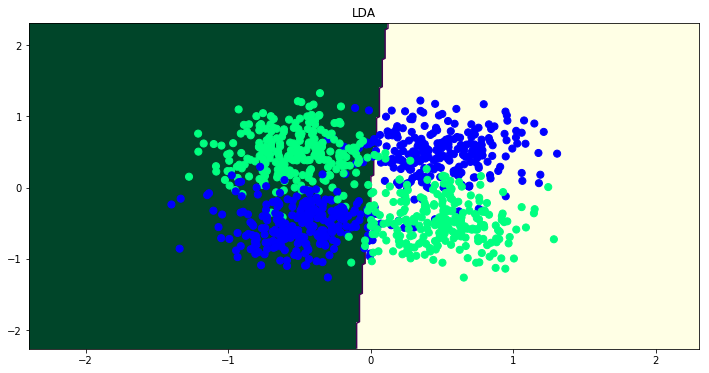

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
model.fit(X_train,Y_train)
visualize_border(model,X_train,Y_train,"LDA")

En este caso, se puede notar claramente que la frontera resultante no es la adecuada. Esto debido a que a simple vista pareciera que la posibilidad de equivocarse es un 50%, ya que la frontera los divide a la mitad. Claramente la frontera de los datos es una no lineal, por lo que este modelo no debería ser el más adecuado.

c) En esta pregunta se utiliza el clasificador QDA para entrenar el modelo. Además, se genera la gráfica para visualizar el resultado.

D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


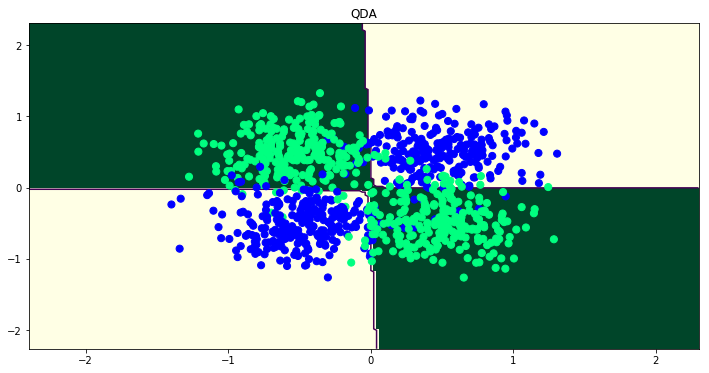

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = QDA()
model.fit(X_train, Y_train)
visualize_border(model,X_train,Y_train,"QDA")

En este gráfico se observa claramente la división de la zona en 4 secciones obtenidas a partir de dos lineas rectas. Estas 4 lineas dejan la mayor cantidad de puntos de una clase en el primer y tercer cuadrante, mientras que la otra clase se encuentra en los cuadrantes dos y cuatro. En este método se puede notar que la frontera clasifica mejor los datos, ya que la mayor cantidad de datos de una clase se encuentran dentro de un cuadrante y solo algunos datos se escapan de su respectivo cuadrante. Se puede concluir que este método es mucho más preciso que el anterior, siendo una buena opción de modelo. Las diferencias claras entre LDA y QDA son la cantidad de rectas que utilizan: 1 y 2 respectivamente. La semejanza es que son dos lineas rectas y utilizan la regla de Bayes.

En las siguientes secciones se utilizarán widgets. Estos permiten tener una experiencia más interactiva pudiendo variar parámetros simplemente. Se importa la librería ipywidgets y se crea una función que permite visualizar los datos a partir de un parámetro. Se elijen los datos de entrenamiento para la visualización.

In [6]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X_train,Y_train) # Se eligen solo los datos de entrenamiento.

d) A continuación, se muestran los resultados obtenidos para el método de SVM lineal. Esto se muestra con la ayuda del widget, con el cuál se puede variar un parámetro que varía el coeficiente de regularización.

In [7]:
from ipywidgets import interactive
from sklearn.svm import SVC as SVM #SVC is for classification

def train_model(param):
    model= SVM()
    C = 10**(param)
    print("Param C= ",C)
    model.set_params(C=C,kernel='linear')
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model
p_min = -6 #define your range
p_max = 4 #define your range
interactive(visualize_border_interactive, param=(p_min,p_max))

interactive(children=(IntSlider(value=-1, description='param', max=4, min=-6), Output()), _dom_classes=('widge…

Es posible notar que variar el coeficiente de regularización no proporciona ningún cambio significativo a la frontera. Esto se puede notar en los valores del Accuracy del modelo, donde su valor es de entre 0.466 y 0.486. El mayor valor de Accuracy se logra con param = -1, pero este no es suficiente ni siquiera para pasar el 0.5 de Accuracy, por lo que el modelo se va a equivocar más de la mitad de las veces en clasificar un dato. Claramente esto nos permite concluir que SVM lineal no es un método que permita resolver el problema.

e) Ahora se mostrarán los resultados al aplicar SVN pero con distintos kernels. Primero se modifica la función train_model.

In [8]:
# Primero se modifica la función train_model y la función que va con el widget.
def train_model(param, ker):
    model= SVM()
    C = 10**(param)
    print("Param C= ",C)
    print("Kernel =", ker)
    model.set_params(C=C,kernel=ker)
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model

def visualize_border_interactive(param, ker):
    model = train_model(param, ker)
    visualize_border(model,X_train,Y_train) # Se eligen solo los datos de entrenamiento.

Primero, se utilizará el kernel "Radial basis function" (rbf).

In [9]:
p_min = -6 #define your range
p_max = 4 #define your range
interactive(visualize_border_interactive, param=(p_min,p_max), ker = "rbf")

interactive(children=(IntSlider(value=-1, description='param', max=4, min=-6), Text(value='rbf', description='…

Como se puede ver, el kernel "rbf" obtiene muy buenos resultados llegando a un accuracity de 0.984 con C = 1. Esto significa que este modelo con este kernel clasificó correctamente la mayor cantidad de los datos, aproximadamente un 98% de ellos. Esto demuestra claramente que "rbf" es una buena opción de kernel. Cabe notar que al aumentar el valor de C, el accuracity comienza a decaer pero sigue siendo mayor a 0.9. Lo mismo sucede si C es menor que 1, la accuracity se reduce pero sigue siendo mayor a 0.9, por lo que sigue siendo una opción mejor que un SVN lineal.

Ahora, se utilizará el kernel polinomial (poly).

In [10]:
interactive(visualize_border_interactive, param=(p_min,p_max), ker = "poly")

interactive(children=(IntSlider(value=-1, description='param', max=4, min=-6), Text(value='poly', description=…

Se puede notar que este kernel no es mejor que "rbf" y ligeramente mejor que SVN lineal. Mediante el accuracity podemos determinar que logra clasificar un poco más de la mitad de los datos, por lo que no es un kernel que logre una mejora significativa al SVN lineal. El mayor accuracity se logra con C mayor a 100 (igual a 0.554) pero como se mencionó anteriormente no es suficiente. Si se observa la gráfica podemos ver que el área verde logra incluir casi todos los puntos, por lo que evidentemente podrá clasificar una buena cantidad correctamente pero también clasificará mal una buena cantidad de ellos.

Ahora se utilizará el kernel "sigmoid".

In [11]:
interactive(visualize_border_interactive, param=(p_min,p_max), ker = "sigmoid")

interactive(children=(IntSlider(value=-1, description='param', max=4, min=-6), Text(value='sigmoid', descripti…

Con este kernel ocurre lo mismo que el kernel polinomial: logra una mejora insignificativa comparado con el kernel lineal. El mayor accracity lo logra con c = 100: 0.512, lo que significa que podrá clasificar cerca de la mitad de los datos correctamente, lo cual no es suficiente. Al disminuir c, la frontera se parece mucho a una lineal, lo que reduce el accuracity y si se aumenta, la accuracity también comienza a reducirse.

El kernel "precomputed" requiere una matriz cuadrada, por lo que no se puede utilizar.

Finalmente, como conclusión, se determina que claramente el kernel "rbf" es superior a todos los demás kernels y además permite resolver el problema y obtener una clasificación de a lo menos 90% de accuracity.

f) Ahora, se mostrará la resolución del problema con árboles de decisión de multiples niveles. Para esto, se redefinen las funciones para visualizar y entrenar.

In [12]:
from sklearn.tree import DecisionTreeClassifier as Tree
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X_train,Y_train) # Se eligen solo los datos de entrenamiento.
def train_model(param):
    print("Profundida:", param)
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model

...#here param=depth
p_min = 1 #define your range
p_max = 40 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

interactive(children=(IntSlider(value=20, description='param', max=40, min=1), Output()), _dom_classes=('widge…

Primero, si tenemos un árbol de decisión de 1 nivel, obtendremos que existe una sola frontera y se el modelo se asemejará al lineal. El accuracity es igual a 0.478, lo que es cercano al accuracity del SVN lineal. Esto se da debido a que es un arbol binario y teniendo un solo nivel simplemente tendremos dos opciones para clasificar los datos. Ahora, al aumentar la profundidad a dos, inmediatamente la accuracity aumenta considerablemente a 0.746. Esto es porque al tener máyor profundidad podemos obtener más criterios para poder clasificar los datos. Luego, si el nivel de profundidad es 3, se obtiene la mayor accuracity: 0.97. Este nivel de precisión es bastante alto y casi llega al mismo nivel que el del kernel "rbf", por lo que este y "rbf" son las mejores opciones hasta ahora para el entrenamiento. Si uno sigue aumentando la profundidad del árbol a mayor de 3, la accuracity comienza a reducirse tendiendo a valores cercanos a 0.9, por lo que en este caso es mejor mantener la profundiad en 3. Al tener mayor profundidad se ocupan más intervalos, por lo que es posible que al aumentar los intervalos se pueda comenzar a clasificar de peor manera que tan solo con 3 de profundidad. Con esto queda demostrado que mayor profundidad no implica mayor precisión.

g) Para esta pregunta, se genera una red nueronal artficial de 1 capa y se va variando la cantidad de nueronas con ayuda del widget.

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def train_model(param):
    n_h=2**(param)
    print("Neuron hidden = ",n_h)
    model = Sequential()
    model.add(Dense(n_h, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(X_train, Y_train, epochs=25, batch_size=128, verbose=0)
    print("Test Accuracy: ",model.evaluate(X_test, Y_test,batch_size=128,verbose=0)[1])
    return model
p_min = 0 #define your range
p_max = 20 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

D:\User\jalis\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


interactive(children=(IntSlider(value=10, description='param', max=20), Output()), _dom_classes=('widget-inter…

Con una neurona, el modelo se parece nuevamente a una SVC lineal. En este caso, el accuracity es mayor que la lineal pero aún así proporciona una mala clasificación de varios datos. Con dos neuronas, el accuractity es casi el mismo y no se obtiene un valor superior a "rbf". Con 4 se logra un accuracity superior a 0.7, llegando incluso a tener superior a 0.8 en alguna de las simulaciones. Con 16 neuronas ya se logra en algunos casos un accuracity superior a 0.9 lo que ya indica que este modelo es una posible elección para resolver el problema. Luego, al seguir aumentando, se nota una tendencia del accucaracity a valer 0.982. Este valor depende de la iteración y está siempre variando pero rondando ese valor. El accuracity aumenta al aumentar las neuronas debido a que con eso pueden extraer mayor información de los datos y con esto tomar mejores decisiones. Es posible que esto también pueda no ser beneficioso al tener neuronas que opaquen mucho las decisiones de otras. Finalmente, esta red nueronal si es capaz de resolver el problema ya que hay casos en que logra un accuracity del 0.99 y no necesariamente con muchas neuronas. Esta entonces podría tener un rendimiento mejor que "rbf".

h) Ahora, se utilizará el modelo k-nn para clasificar el problema. Para esto, nuevamente se modifica la función train_model.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
def train_model(param):
    print("Vecinos:", param)
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model
p_min = 1 #define your range
p_max = 800 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

interactive(children=(IntSlider(value=400, description='param', max=800, min=1), Output()), _dom_classes=('wid…

Utilizando este modelo, el problema obtiene un 0.9 de accuracity con tan solo un vecino. Esto ocurre porque generalmente el otro punto más cercano a otro punto es de la misma clase. Al ir aumentando los veecinos, se puede ver que la accuracity tiende al aumentar, esto ya que al tener más vecinos se puede asegurar que los que están cerca son de su clasificación y no caer en que justo el punto se encuentra al lado de uno que no corresponde a su clasificación. El mejor accuracity (0.988) se logra con 138 vecinos. Esta precisión es incluso mejor que "rbf", por lo que este modelo es una gran opción para resolver el problema. Finalmente, si uno comienza a agregar más vecinos, como alrededor de los 165 vecinos comienza a existir una tendencia a la baja del accuracity, para finalmente tener una muy baja si es que se tiene una cantidad de vecinos muy cercana a la cantidad de datos (0.22 de accuracity con 800 vecinos). Esto sucede porque claramente si uno contidera casi todo el dataset como vecino, la mayoría de los puntos serán clasificados con la clase que más miembros tiene en el conjunto de entrenamiento. Con esto se concluye que más vecinos tampoco signfica una mayor accuracity, hay un número específico donde se logra esta.

i) Se vuelve a generar el dataset, ahora con una clase con muchos más elementos que la otra (completamente desbalanceado).

In [15]:
X_train,Y_train,X_test,Y_test = do_gaussianXOR(n1=250,n2=5)
print ("Datos de entrenamiento:", X_train, Y_train)
print ("Datos de prueba:", X_test, Y_test)
unique, counts = np.unique(Y_train, return_counts=True)
print("Cantidad de elementos en cada clase conjunto de entrenamiento:", dict(zip(unique, counts)))
unique, counts = np.unique(Y_test, return_counts=True)
print("Cantidad de elementos en cada clase conjunto de prueba:", dict(zip(unique, counts)))

Datos de entrenamiento: [[ 1.02921570e+00  6.20047163e-01]
 [ 7.93621395e-01  1.17226796e+00]
 [ 1.06026740e+00  2.06816636e-01]
 [ 7.85026525e-01  4.54592838e-01]
 [ 4.69034344e-01  6.23179551e-01]
 [ 5.43213071e-01  9.36282052e-01]
 [ 7.28311318e-01  5.36502505e-01]
 [ 6.33158970e-01  6.00102298e-01]
 [ 9.48223722e-01  4.38452521e-01]
 [ 5.93920310e-01  2.43771278e-01]
 [-2.65896945e-01  6.96085579e-01]
 [ 7.59330860e-01  2.77350494e-01]
 [ 1.18092639e+00  6.36902976e-02]
 [ 5.13727555e-01  4.43844845e-01]
 [ 9.59833764e-01  9.40807631e-01]
 [ 5.46484228e-01  6.13448756e-01]
 [ 2.33664276e-01 -9.42389405e-02]
 [ 3.95626355e-01  5.46904691e-01]
 [ 8.69087204e-01  8.60713955e-01]
 [ 3.83801955e-01  4.09309175e-01]
 [ 1.85434110e-01  7.39946188e-02]
 [-1.18810572e-02  1.08523262e+00]
 [ 3.47104345e-01  3.68577710e-01]
 [ 1.24161392e-01  7.33247107e-01]
 [ 1.58306457e-02  4.36177916e-01]
 [ 2.31360032e-01  6.16070749e-01]
 [ 3.46758459e-01  1.45810345e-01]
 [ 4.91545331e-01  6.28499561e-

Se visualiza claramente que la cantidad de los elementos de la clase "1" es claramente baja. Contando las ocurrencias se tiene que en el conjunto de entrenamiento hay 500 de clase 0 y 10 de clase 1. El conjunto de prueba es más balanceado con 142 elementos "false" y 113 elementos "true".

j) Se calculara el accuracity para el conjunto anterior utilizando RBF con C = 1 y con un arbol de decisión de profundidad 5.

In [16]:
model= SVM()
C = 1
print("##RBF##")
print("Param C= ",C)
print("Kernel =", "rbf")
model.set_params(C=C,kernel="rbf")
model.fit(X_train,Y_train)
print("Test Accuracy para rbf: ",model.score(X_test,Y_test))

print("##Árbol decisión##")
print("Profundidad= ", 5)
model = Tree()
model.set_params(max_depth=5,criterion='gini',splitter='best')
model.fit(X_train,Y_train)
print("Test Accuracy para árbol de decisión: ",model.score(X_test,Y_test))

##RBF##
Param C=  1
Kernel = rbf
Test Accuracy para rbf:  0.5568627450980392
##Árbol decisión##
Profundidad=  5
Test Accuracy para árbol de decisión:  0.5647058823529412


En estos casos se obtiene un accuracity muy por debajo al que se obtuvo con el conjunto anterior, además esta no es suficiente para poder resolver el problema de clasificación.

K) Finalmente, se mostrará que agregando un peso a la función objetivo para las distintas clases, se puede mejorar el accuracity de la pregunta anterior.

In [17]:
classes_weights = {0: 0.1, 1: 10} #or choose..
model= SVM()

print("##RBF##")
print("Param C= ",1)
print("Kernel =", "rbf")
model.set_params(C=1,kernel='rbf', class_weight=classes_weights or 'balanced') #for svm
model.fit(X_train,Y_train)
print("Test Accuracy para rbf con peso: ",model.score(X_test,Y_test))

print("##Árbol decisión##")
print("Profundidad= ", 5)
model = Tree()
model.set_params(max_depth=5,criterion='gini',splitter='best', class_weight=classes_weights or 'balanced')
model.fit(X_train,Y_train)
print("Test Accuracy para árbol de decisión con peso: ",model.score(X_test,Y_test))

##RBF##
Param C=  1
Kernel = rbf
Test Accuracy para rbf con peso:  0.8274509803921568
##Árbol decisión##
Profundidad=  5
Test Accuracy para árbol de decisión con peso:  0.7450980392156863


Luego de colocar los pesos, se puede notar que el accuracity ha mejorado bastante. Esto se logró al darle un peso menor a la clase que se encontraba en mayor cantidad y al darle un peso mayor al de menor cantidad. ¿qué pasa si se le da mucho peso a la clase con menor cantidad y se le quita mucho peso a la de mayor?

In [18]:
classes_weights = {0: 0.001, 1: 1000} #or choose..
model= SVM()

print("##RBF##")
print("Param C= ",1)
print("Kernel =", "rbf")
model.set_params(C=1,kernel='rbf', class_weight=classes_weights or 'balanced') #for svm
model.fit(X_train,Y_train)
print("Test Accuracy para rbf con peso: ",model.score(X_test,Y_test))

print("##Árbol decisión##")
print("Profundidad= ", 5)
model = Tree()
model.set_params(max_depth=5,criterion='gini',splitter='best', class_weight=classes_weights or 'balanced')
model.fit(X_train,Y_train)
print("Test Accuracy para árbol de decisión con peso: ",model.score(X_test,Y_test))

##RBF##
Param C=  1
Kernel = rbf
Test Accuracy para rbf con peso:  0.44313725490196076
##Árbol decisión##
Profundidad=  5
Test Accuracy para árbol de decisión con peso:  0.45098039215686275


Como se puede ver, los resultados son peores que cuando no tenían peso asignado, por lo que hay que tener cuidado al peso que uno le está asignando a las variables ya que como ocurre con muchos otros parámetros: aumentar o disminuir en exceso puede no ser benficioso para el entrenamiento. Estos deben ser elegidos cuidadosamente.

<a id="refs"></a>
## Referencias
[1] Keras: Deep Learning library for Theano and TensorFlow. https://keras.io/  
[2] http://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html  
[3] https://en.wikipedia.org/wiki/Kernel_method  
[4] http://scikit-learn.org/stable/modules/multiclass.html  
[5] Tsoumakas, G., & Katakis, I. (2007). *Multi-label classification: An overview*. International Journal of Data Warehousing and Mining (IJDWM), 3(3), 1-13.  
[6] https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-6-feature-engineering-and-feature-selection-8b94f870706a  
[7] Bishop, C. M. (2006). *Pattern recognition and machine learning (information science and statistics)* springer-verlag new york. Inc. Secaucus, NJ, USA.